## Ev Fiyatları

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")#hataları gösterme

In [2]:
df=pd.read_csv("kc_house_data.csv")#evlerin özelliklerine göre fiyat tahmin etme

$$ \int_{-2}^{-5}\frac{x^2}{x+1}dx$$

EDA

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [7]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [8]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10967,8731901610,20140917T000000,282000.0,3,2.25,2420,7548,1.0,0,0,...,8,1370,1050,1967,0,98023,47.3112,-122.376,2150,8000
15902,1774000050,20140507T000000,480500.0,4,2.50,2180,11200,1.0,0,0,...,8,2180,0,1968,0,98072,47.7476,-122.086,1790,11200
19660,306000565,20140825T000000,290000.0,2,1.50,1020,1275,3.0,0,0,...,8,1020,0,2008,0,98103,47.7003,-122.346,980,1415
15235,809003105,20150408T000000,935000.0,3,2.00,1720,2000,1.5,0,0,...,8,1060,660,1910,2000,98109,47.6384,-122.350,1590,4000
12898,3345100184,20141020T000000,443950.0,3,1.75,2000,36000,1.0,0,0,...,6,2000,0,1946,1995,98056,47.5217,-122.182,2100,9681
11769,1120069036,20141218T000000,325000.0,3,2.25,1570,43350,1.0,0,3,...,7,1570,0,1967,0,98022,47.2377,-122.016,1570,220849
18346,142000175,20140822T000000,625000.0,3,1.75,2240,6050,1.0,0,0,...,8,1250,990,1950,0,98116,47.5658,-122.400,1720,6050
15540,3361400980,20150512T000000,135000.0,2,1.00,600,6120,1.0,0,0,...,5,600,0,1943,1989,98168,47.5000,-122.317,1090,6120
16234,3395041206,20140925T000000,285000.0,3,2.50,1800,2516,2.0,0,0,...,7,1800,0,2001,0,98108,47.5401,-122.293,1800,2562
18580,2619950740,20150109T000000,435000.0,3,2.50,2260,5100,2.0,0,0,...,8,2260,0,2007,0,98019,47.7341,-121.968,2260,5100


In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
abs(df.corr()["price"]).sort_values(ascending=False)#ascending=Fale büyükten küçüğe True küüçükten büyüğe

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

<AxesSubplot:>

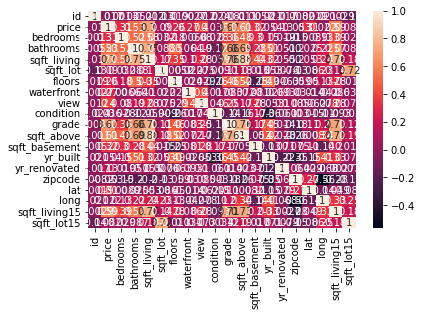

In [11]:
sns.heatmap(df.corr(),annot=True)#%90dan fazla olan bağlantı tekrarı gösterir

In [12]:
x=df[["sqft_living","grade","sqft_living","bathrooms","view","sqft_basement","bedrooms","lat","waterfront","floors"]]

In [13]:
x.head()

,sqft_living,grade,sqft_living,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors
0,1180,7,1180,1.00,0,0,3,47.5112,0,1.0
1,2570,7,2570,2.25,0,400,3,47.7210,0,2.0
2,770,6,770,1.00,0,0,2,47.7379,0,1.0
3,1960,7,1960,3.00,0,910,4,47.5208,0,1.0
4,1680,8,1680,2.00,0,0,3,47.6168,0,1.0


In [14]:
x.shape

(21613, 10)

In [15]:
y=df[["price"]]

In [16]:
y.shape

(21613, 1)

In [17]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [18]:
from sklearn.linear_model import LinearRegression  #sklearn=Science Kit Learn
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=13) #rastgele seçsin diye random state i kullanıyorlar
print("Values in x_train",x_train)
print("Values in y_train",y_train) #train test split ile eğitime ve teste veri arıyoruz eğitim için verilen verilerle o bir denklem çıkarıyor ve test verilerinde deniyor

Values in x_train        sqft_living  grade  sqft_living  bathrooms  view  sqft_basement  \
1571          2000      7         2000       1.50     0            830   
16330         2630      8         2630       2.50     0              0   
12786         2620      9         2620       2.50     0              0   
12524         1610      7         1610       2.50     0              0   
16179          880      6          880       1.00     0              0   
...            ...    ...          ...        ...   ...            ...   
153           5180     12         5180       3.25     3           1640   
866           3460      7         3460       2.50     0              0   
74            1790      7         1790       1.75     0            700   
14512          820      7          820       1.00     0              0   
338           1420      7         1420       1.75     0              0   

       bedrooms      lat  waterfront  floors  
1571          4  47.3708           0     1.0  

In [20]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((17290, 10), (4323, 10), (17290, 1), (4323, 1))

In [21]:
lr=LinearRegression() #kısalttım ve lr ile öğrettim
regmodel=lr.fit(x_train,y_train)

In [22]:
y_pretest=lr.predict(x_test) #predict ile tahmin ediyor
y_pretest

array([[366692.06181025],
       [131671.09766449],
       [161154.54305761],
       ...,
       [393222.90829465],
       [478212.7979829 ],
       [241435.03554883]])

In [23]:
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
(mean_squared_error(y_test,y_pretest))**0.5 #eksi çıkmasın diye karesini almıştık tekrar karekökünü aldık

205790.45924409645

In [25]:
r2_score(y_test,y_pretest) #basarılı diyebilmek için hata<100000, r2>0,80 olmalı

0.672350074666825

In [26]:
x,y= df[["sqft_living","grade","sqft_living","bathrooms","view","sqft_basement","bedrooms","lat","waterfront","floors"]],df[["price"]]

In [27]:
print (lr.coef_)

[[ 9.96470866e+01  8.32339598e+04  9.96470866e+01 -3.11745201e+03
   6.61218204e+04 -6.85809142e+00 -2.66694562e+04  6.77737264e+05
   6.02319267e+05 -3.29288530e+04]]


In [28]:
x.sample(10)

,sqft_living,grade,sqft_living,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors
19512,940,7,940,1.00,0,0,2,47.4631,0,1.0
19763,2730,8,2730,3.50,0,730,4,47.7327,0,2.0
9440,1470,7,1470,1.00,0,250,3,47.5276,0,1.0
13615,1400,7,1400,1.50,0,0,3,47.2878,0,1.0
949,3680,10,3680,2.50,0,0,3,47.5484,0,2.0
19010,3970,10,3970,2.75,0,1790,6,47.5956,0,1.0
17628,1610,7,1610,2.50,0,0,3,47.2583,0,2.0
15412,2110,7,2110,2.25,0,750,3,47.3082,0,1.0
15596,2210,8,2210,2.50,0,0,4,47.3500,0,2.0
1255,2410,7,2410,2.50,0,470,2,47.5629,0,1.0


In [29]:
df["grade"].unique() #gradelerde kaç eşsiz kategori var (örneğin kaç eşsiz cinsiyet var diye sordum ve kadın, erkek cevabını aldım)

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [30]:
x=pd.get_dummies(x,drop_first=True) #kukla değişken: object verilerin tüm türlerini kategori haline getirdi ve olanlara bir olmayanlara sıfır yazdı(örneğin araba markası toyota olanlara 1 olmayanlara sıfır)#ilkiniat (drop first )dedik çünkü diğerleri değilse kalan sütundur

In [31]:
x.head() #bu dosyada object veriler olöadığı için kod bir şeyi değiştirmedi

,sqft_living,grade,sqft_living,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors
0,1180,7,1180,1.00,0,0,3,47.5112,0,1.0
1,2570,7,2570,2.25,0,400,3,47.7210,0,2.0
2,770,6,770,1.00,0,0,2,47.7379,0,1.0
3,1960,7,1960,3.00,0,910,4,47.5208,0,1.0
4,1680,8,1680,2.00,0,0,3,47.6168,0,1.0


In [32]:
df["zipcode"]=df["zipcode"].astype("category")

In [33]:
import pandas as pd
import numpy as np# sayısal cebir işlemlerini yapmamızı sağlayan paket (bilim paketi)
import matplotlib.pyplot as plt

In [34]:
%matplotlib inline

In [35]:
import seaborn as sns

<AxesSubplot:xlabel='bathrooms'>

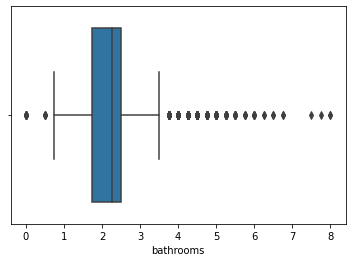

In [36]:
sns.boxplot("bathrooms",data=df)

<AxesSubplot:xlabel='bedrooms'>

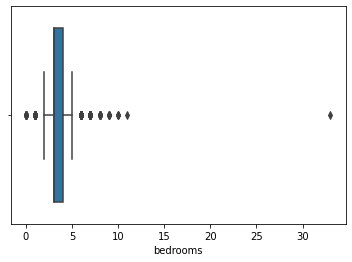

In [37]:
sns.boxplot("bedrooms",data=df)

In [38]:
df=df[df["bedrooms"]<10] #ortalamayı yükselten yatak odası sayısındaki extrem outlierları çıkardık

In [39]:
df=df[df["bathrooms"]<7]

In [40]:
df["bedrooms"]=df["bedrooms"]**2 #sayılar önemli olmasına rağmen küçük olduğu için karesini aldık

In [41]:
df["bathrooms"]=df["bathrooms"]**2

In [42]:
df["age"]=2022-df["yr_built"] #yapım yılından çok kaç yaşında olduğu önemli olduğu için veriyi yaşa çevirdik

In [43]:
abs(df.corr()["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.699791
grade            0.670723
sqft_above       0.602437
sqft_living15    0.589091
bathrooms        0.564789
view             0.395974
sqft_basement    0.320080
bedrooms         0.313275
lat              0.311068
waterfront       0.271001
floors           0.258165
yr_renovated     0.124584
sqft_lot         0.089104
sqft_lot15       0.081512
yr_built         0.055753
age              0.055753
condition        0.036779
long             0.022445
id               0.018722
Name: price, dtype: float64

In [44]:
x=pd.get_dummies(df,drop_first=True)

In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21604 entries, 0 to 21612
Columns: 460 entries, id to zipcode_98199
dtypes: float64(5), int64(15), uint8(440)
memory usage: 12.5 MB


In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17290, 10), (4323, 10), (17290, 1), (4323, 1))

In [47]:
regmodel=lr.fit(x_train,y_train)

In [48]:
y_pretest=regmodel.predict(x_test)

In [49]:
(mean_squared_error(y_test,y_pretest))**0.5

205790.45924409645

In [50]:
r2_score(y_test,y_pretest)

0.672350074666825

In [51]:
#Extra Tree Regressor
from sklearn.tree import ExtraTreeRegressor
ETR=ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_pred_etr=ETR.predict(x_test)

In [52]:
(mean_squared_error(y_test,y_pred_etr))**0.5

236865.00802631574

In [53]:
r2_score(y_test,y_pred_etr)

0.5659283569582824

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [56]:
y_pred_gbr=GBR.predict(x_test)

In [57]:
(mean_squared_error(y_test,y_pred_gbr))**0.5

154291.95018390924

In [58]:
r2_score(y_test,y_pred_gbr)

0.8158184441178422

In [59]:
from sklearn.neighbors import KNeighborsRegressor
est=KNeighborsRegressor(n_neighbors=10,weights="uniform")
model=est.fit(x_train,y_train)

In [60]:
y_pred_knb=model.predict(x_test)

In [61]:
(mean_squared_error(y_test,y_pred_knb))**0.5

242541.1893809583

In [62]:
r2_score(y_test,y_pred_knb)

0.5448750895173702

In [63]:
#model.save("neyazmak istersen") (modeli kaydetmek için)
#model.load(geri yüklemek için)